<a href="https://colab.research.google.com/github/JuanJoseCardenas/Modelado-y-simulaci-n/blob/master/proyecto_modelado_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

##THRE-DIMENSIONAL CHAOTIC SYSTEM WITHOUT EQUILIBRIUM POINT 

---

[https://pdfs.semanticscholar.org/fc8e/6a86af5231223c55010be640126c820978ee.pdf](https://)

Juan José Cárdenaso Osorio-1053871534


En el siguiente archivo se pretende mostrar gráficamente aproximaciones numéricas de un sistema no lineal sin puntos de equilibrio dadas por el siguiente modelo: 






<center>

  $\dot{x}={ay-x-zy}$

   $\dot{y}={-bzx-cx+yz+d}$
   
   $\dot{z}={e-fxy-x^2}$











Donde a, b, c, d, e, y f son los parámetros variables que modelan el sistema, en este caso se toman los valores 2.8, 0.2, 1.4, 1, 10 y 2, respectivamente. Estos parámetros pueden ser usados para la representación de un circuito simple para simular la respuesta al caos que tienen.

A continuación se procederá a obtener y analizar la respuesta del modelo a diferentes condiciones: 

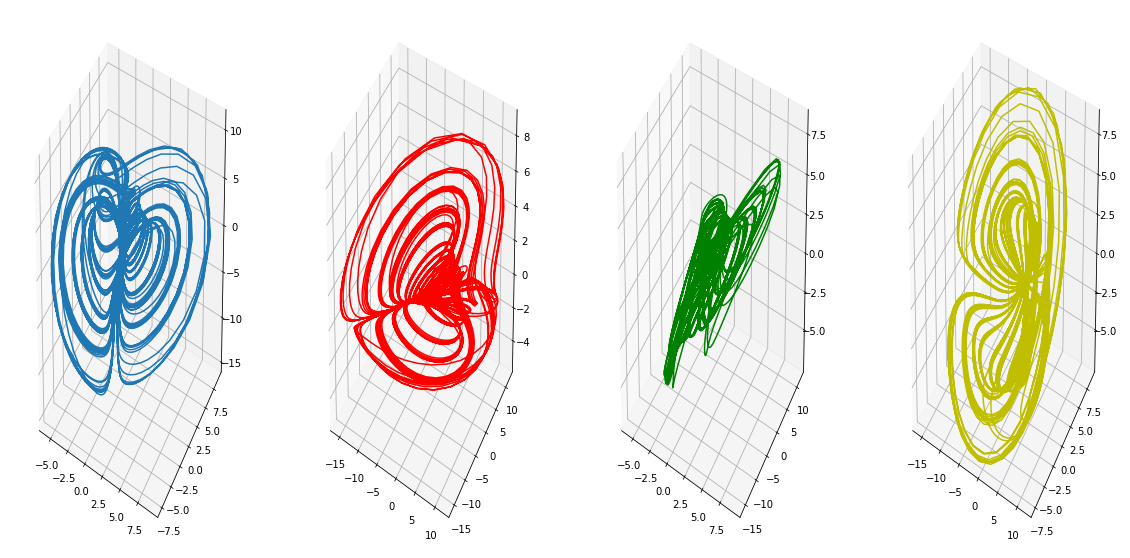

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
def model (t,y,a,b,c,d,e,f):
  return [a*y[1]-y[0]+y[2]*y[1],-b*y[0]*y[2]-c*y[0]+y[1]*y[2]+d,e-f*y[0]*y[1]-y[0]**2]

a,b=50,300
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

sol=solve_ivp(model,[a,b],y0,args=(2.8,0.2,1.4,1,10,2),t_eval=t)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 4, 1, projection='3d')
h=ax.plot3D(sol.y[1], sol.y[0], sol.y[2])

ax = fig.add_subplot(1, 4, 2, projection='3d')
j=ax.plot3D(sol.y[2], sol.y[2], sol.y[1],'r')


ax = fig.add_subplot(1, 4, 3, projection='3d')
j=ax.plot3D(sol.y[1], sol.y[2], sol.y[0],'g')

ax = fig.add_subplot(1, 4, 3, projection='3d')
j=ax.plot3D(sol.y[1], sol.y[2], sol.y[0],'g')

ax = fig.add_subplot(1, 4, 4, projection='3d')
j=ax.plot3D(sol.y[2], sol.y[0], sol.y[0],'y')
#ax.scatter3D(,"o",color="black")
plt.show()

Como se puede observar en las gráficas anteriores, el modelo se asemeja al sistema de Lorentz, esto debido a que se obtiene algo similar a unas alas de mariposa donde muchas condiciones iniciales parecen acercarse pero nunca llegar a tocarse.

10000

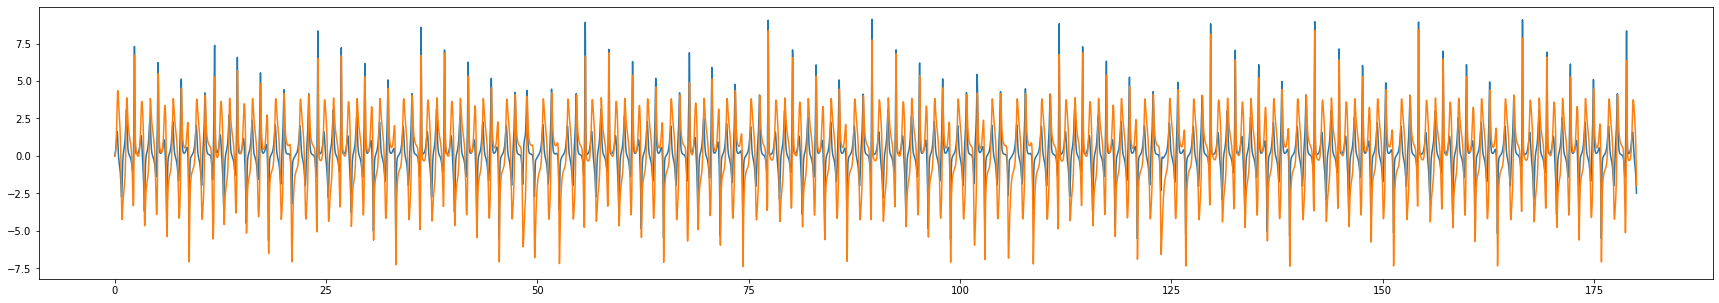

In [ ]:

def lorenz (t,y,a,b,c,d,e,f):
  return [a*y[1]-y[0]+y[2]*y[1],-b*y[0]*y[2]-c*y[0]+y[1]*y[2]+d,e-f*y[0]*y[1]-y[0]**2]

a,b=0,500
t= np.linspace(a,b,10000)
y0=[0,0.0001,0.1]


sol=solve_ivp(lorenz,[a,b],y0,args=(2.8,0.2,1.4,1,10,2),t_eval=t)

t1=np.linspace(0,180,10000)
fig = plt.figure(figsize=[30,5])
j = fig.add_subplot(1, 1, 1)
j.plot(t1,sol.y[1],t1,sol.y[0])
len(sol.y[0])

Para rectificar que el modelo está totalmente sumido en caos, se graficó independientemente las soluciones para $\dot{x}$ y $\dot{y}$, y se puede observar que en ningún momento del tiempo de la simulación el sistema está convergiendo hacia un punto. 

##Bifurcations 

time= 2680.9408280000002


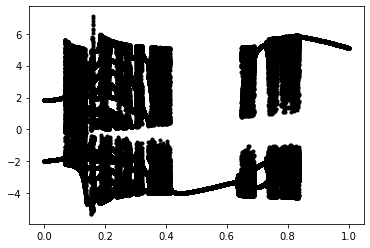

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


def model (t,y,a,b,c,d,e,f):
  return [a*y[1]-y[0]+y[2]*y[1],-b*y[0]*y[2]-c*y[0]+y[1]*y[2]+d,e-f*y[0]*y[1]-y[0]**2]

def event_model (t,y,a,b,c,d,e,f):
  return y[1]+y[0]+y[2]
# event_lorenz.terminal=True
event_lorenz.direction=-1

a,b=0,100
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(0,1,0.0001):
  sol=solve_ivp(model,[a,b],y0,args=(2.8,r,1.4,1,10,2),t_eval=t,events=event_model,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)



Como se puede observar, en el diagrama de bifurcación, se tomó el parámetro b para variarlo y se obtuvo una gráfica similar a la del artículo, donde esta es un acercamiento de la misma entre 0.2 y 0.25 

Como se puede ver, el código se tardó 2680 segundos, que es el equivalente a 44 minutos, así que no se correrá el código otra vez si no es necesario.

time= 4066.7446099999997


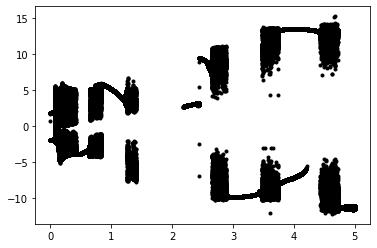

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


def model (t,y,a,b,c,d,e,f):
  return [a*y[1]-y[0]+y[2]*y[1],-b*y[0]*y[2]-c*y[0]+y[1]*y[2]+d,e-f*y[0]*y[1]-y[0]**2]

def event_model (t,y,a,b,c,d,e,f):
  return y[1]+y[0]+y[2]
# event_lorenz.terminal=True
event_lorenz.direction=-1

a,b=100,250
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(0,5,0.001):
  sol=solve_ivp(model,[a,b],y0,args=(2.8,r,1.4,1,10,2),t_eval=t,events=event_model,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)


En un último intento de obtener el mismo diagrama de bifurcación que está en el artículo, se le dieron más puntos y más precisión a la simulación la cual tardó una hora en graficarlo; sin embargo, dado que el sistema está en un caos total, lograr obtener la misma gráfica es difícil a menos de que se tome una mayor cantidad de puntos y un mayor tiempo de simulación. 